In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_performance(perf_df, title):
    fig = plt.figure(figsize=(8, 6))
    ax = plt.subplot(111)
    ax.grid()
    for algo, data in perf_df.groupby("algorithm"):
        ax.scatter(data["k"].to_numpy(), data["time"].to_numpy(), label=algo, alpha=0.8)

    # https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True)
    ax.set_ylabel("Time (milliseconds)")
    ax.set_xlabel("$k$")
    ax.set_title(title, fontsize=16)

    plt.show()
    return fig

# Single Core Performance

In [3]:
single_core = pd.read_csv("results/single_core_result.csv")
single_core

,algorithm,threads,n,k,rep,dtype,time
0,Naive,1,30000000,3000000,0,i32,1927
1,SeqPriority,1,30000000,3000000,0,i32,77
2,ParPriority,1,30000000,3000000,0,i32,15454
3,SeqPermutation,1,30000000,3000000,0,i32,310
4,FullPermutation,1,30000000,3000000,0,i32,17674
...,...,...,...,...,...,...,...
445,SeqPriority,1,30000000,27000000,14,i32,97
446,ParPriority,1,30000000,27000000,14,i32,9544
447,SeqPermutation,1,30000000,27000000,14,i32,449
448,FullPermutation,1,30000000,27000000,14,i32,17978


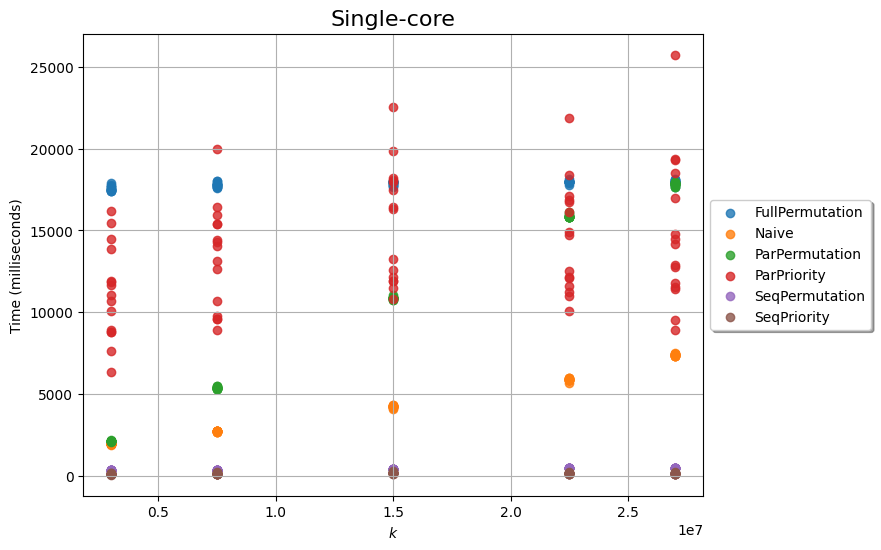

In [4]:
single_fig = plot_performance(single_core, "Single-core")
single_fig.savefig("../presentation/figures/single_core.png", bbox_inches='tight')

# Multi-core Performance without Hyperthreading

In [5]:
multi_core = pd.read_csv("results/multi_core_result.csv")
multi_core

,algorithm,threads,n,k,rep,dtype,time
0,Naive,12,30000000,3000000,0,i32,1905
1,SeqPriority,12,30000000,3000000,0,i32,92
2,ParPriority,12,30000000,3000000,0,i32,1079
3,SeqPermutation,12,30000000,3000000,0,i32,59
4,FullPermutation,12,30000000,3000000,0,i32,9569
...,...,...,...,...,...,...,...
445,SeqPriority,12,30000000,27000000,14,i32,173
446,ParPriority,12,30000000,27000000,14,i32,1561
447,SeqPermutation,12,30000000,27000000,14,i32,171
448,FullPermutation,12,30000000,27000000,14,i32,9568


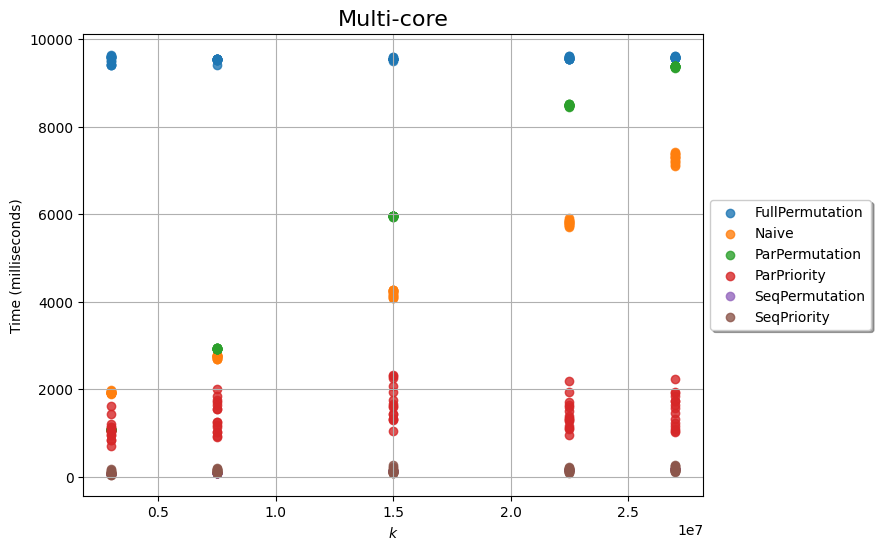

In [6]:
multi_fig = plot_performance(multi_core, "Multi-core")
multi_fig.savefig("../presentation/figures/multi_core.png", bbox_inches='tight')

# Multi-core Performance with Hyperthreading

In [7]:
multi_hyper = pd.read_csv("results/multiht_core_result.csv")
multi_hyper

,algorithm,threads,n,k,rep,dtype,time
0,Naive,24,30000000,3000000,0,i32,1910
1,SeqPriority,24,30000000,3000000,0,i32,65
2,ParPriority,24,30000000,3000000,0,i32,1238
3,SeqPermutation,24,30000000,3000000,0,i32,54
4,FullPermutation,24,30000000,3000000,0,i32,10583
...,...,...,...,...,...,...,...
445,SeqPriority,24,30000000,27000000,14,i32,88
446,ParPriority,24,30000000,27000000,14,i32,1108
447,SeqPermutation,24,30000000,27000000,14,i32,170
448,FullPermutation,24,30000000,27000000,14,i32,10512


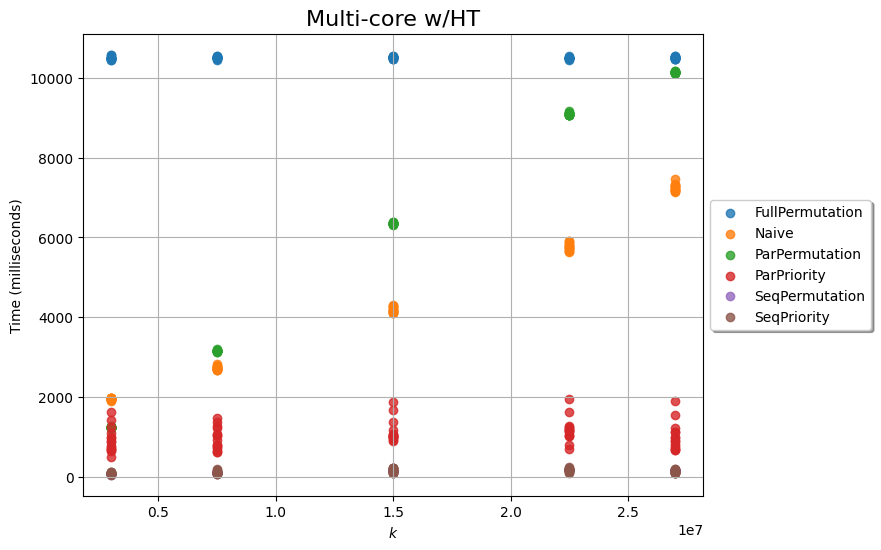

In [8]:
multiht_fig = plot_performance(multi_hyper, "Multi-core w/HT")
multiht_fig.savefig("../presentation/figures/multiht_core.png", bbox_inches='tight')